# DARE Summer School, Atmospheric modelling

Mark Lunt (mark.lunt@ed.ac.uk)

## Contents

This notebook examines the variations of methane in the atmosphere. By the end of the exercise you should have a better understanding of:
1. The use of simple box models to interpret variations in atmospheric compostion
2. The contributions of sources and sinks to recent atmospheric methane growth
3. How a box model can be used to model the impact of policy initiatives 

**To run the code below:**
1. Click on the cell you wish to run
2. Press SHIFT+ENTER on your keyboard or press the Run button in the toolbar above
3. A '#' at the beginning of a line denotes a comment, which will not be interpreted when running the code.

The code is written in Python. No expertise is required, although you will need to write some simple lines of code to answer some of the questions. **Questions are in bold.**

To start, run the cell below to import the Python packages that are necessary to run the code and to initialize the box model.

In [1]:
import box_model
import numpy as np

In [2]:
help(box_model)

Help on module box_model:

NAME
    box_model - A module to setup box model for DARE Summer School practical

DESCRIPTION
    Created on Mon Jul  4 16:00:57 2022
    
    @author: mlunt

FUNCTIONS
    get_noaa_data()
        Retrieve NOAA CH4 data from 2005-2022 
        Returns:
            ch4_obs: NOAA global mean CH4 data from January each year 2005-2022 inclusive.
            years: numpy array of integers 2005-2022
    
    model(years, m0, emis, k)
        Run global box model of CH4 concentration
        Args:
            years: Array of integer years (numpy array)
            m0: Initial CH4 mole fraction in ppb (scalar)
            emis: CH4 emissions. Either np array of len(nyears) or a scalar
            k: Loss rate of methane. Either np array of len(nyears) or a scalar
        Returns:
            m_ppb: Array len(nyears) of CH4 concentration
    
    plot_model(years, m)
        Plot the CH4 concentration as a function of time
        Args:
            years: Array of in

The box model is based on the following:

Equation 1:
$\frac{dm}{dt} = E - km$      

Equation 2:
$m_{[t]} = m_{[0]} e^{-kt} + \frac{E}{k} (1 - e^{-kt})$                           

This describes the change of mass in the box over time as a function of the sources and sinks.

First lets set up the model with some initial parameters. These include the number of years to calculate, the initial concentration, a fixed emissions rate and a fixed lifetime. 

In [3]:
years = np.arange(0, 100)   # Array of years - np.arange creates a sequence between (lower,upper,step) Step = 1 if unspecified 
ch4_initial =0    # Initital CH4 concentration in ppb
emis = 400.    # Fixed emissions rate in Tg/yr
lifetime = 10.    # CH4 lifetime in years
k=1/lifetime      # Loss rate as 1/lifetime


Now run the model with these parameters by running the cell below and plot the output:

[1445.43056046 1445.44753768 1445.46289931 1445.47679909 1445.48937612
 1445.5007563  1445.51105351 1445.52037081 1445.52880145 1445.53642981]


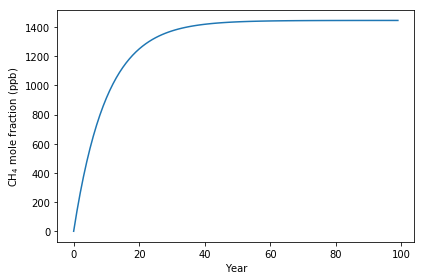

In [4]:
ch4 = box_model.model(years, ch4_initial, emis,k)

box_model.plot_model(years,ch4)
print(ch4[-10:])

You should see that given a constant emissions rate and constant lifetime the model tends towards a steady state value where dm/dt = 0. 

**Try varying the emissions rate, lifetime and initial CH4 concentration. How does this affect the steady state value and the time taken to reach it?** 

Between 2000-2006 the atmospheric growth rate of methane was roughly zero indicating steady state at a concentration of around 1775 ppb. Emissions during this period are estimated to be around 540 Tg. 

**Tune the model CH4 lifetime so that a steady state concentration of 1775 ppb is achieved given an emissions rate of 540 Tg/yr.**

**What is the value of this methane lifetime?**


The pre-industrial methane concentration was around 775 ppb in 1850. With your tuned value of lifetime, **how many years does it take for CH4 levels to approach 1775 ppb?** 

**Why in reality did it take longer?** 

**How would you adapt the model inputs to provide a more realistic evolution of CH4 concentration over time?** 

## Calculating recent emissions

We can rearrange equation 2 to express the emissions required to result in a change of emissions over time.

Equation 3:
$ E = k \frac{ (m_{[t]} - m_{[0]}e^{-kt}) } {(1 - e^{-kt})}$

For instance, the code below calculates the constant emissions rate needed to increase the mole fraction from 1775 ppb to 1825 ppb over a period of 10 years.  



In [5]:
atm_convert = 2.7677 # Tg/ppb
E = k *atm_convert * (1825-1775) * np.exp(-10*k) / (1 - np.exp(-10*k))
print (E)

8.053684658011175


We can read in some recent global mean atmospheric CH4 data from the NOAA network using the code in the cell below. The data are the monthly means from January of each year between 2005 and 2022 inclusive.  

**Adapt the equation in the cell above to calculate the annual emission in each year from 2005 to 2021.** The lifetime should be the same value you calculated earlier.
 

In [6]:
ch4_noaa, noaa_years = box_model.get_noaa_data()

print(ch4_noaa) 
print(noaa_years)

# Calculate 2005-2021 emissions here:
# Hint - you will need to define E as an array



[1776.  1779.5 1779.2 1786.8 1795.1 1797.1 1800.5 1807.3 1814.1 1816.9
 1832.9 1842.5 1849.8 1854.5 1865.  1874.  1890.7 1908.9]
[2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018
 2019 2020 2021 2022]


The recent growth of atmospheric methane in 2020 and 2021 is the subject of current debate and study. Hopefully you will have quantified the change in global emissions required to increase the atmospheric concentration from 2019 to the values seen in 2020 and 2021. 

What impact would changing the sink have? Use and edit the code below to keep 2019 emissions constant in 2020 and 2021 but vary the loss rate, k. **How much would the lifetime need to increase by to explain the observed changes in 2020 and 2021?**  



In [7]:
years = np.arange(2019, 2022)
lifetime_2019 = lifetime
lifetime_2020 = lifetime_2019*1.05
lifetime_2021 = lifetime_2019*1.05
emis_2019  = E[-2]   # The negative index indicates the 2nd index from the end. If 2021 is the final index [-1], 2020 is [-2]

k_array = np.asarray([1/lifetime_2020, 1/lifetime_2021])

# Run model with temporally variant loss rate, k
ch4 = box_model.model(years, ch4_noaa[-3], emis_2019,k_array)

print(ch4)
print(ch4_noaa[-3:]) # This statement prints the final 3 indices of the ch4_noaa array

IndexError: invalid index to scalar variable.

**What reason might there be for a change in lifetime in 2020?** 

**Assuming that 2021 conditions returned to the same as 2019, can the sink alone explain the 2021 growth rate?**

What additional information or data might help explain the CH4 growth rate in 2020 and 2021?

## Global methane pledge

The global methane pledge aims to reduce global anthropogenic methane emissions by 30% by 2030 relative to 2020 emissions. 

1. Assume anthropogenic emissions were around 400 Tg in 2020.
2. Assume a gradual decrease in emissions of 3% per year over the next 10 years. 
3. Assume natural emissions and sinks remain unchanged.

**How does the global methane concentration evolve between 2020 and 2030?** 

Assume emissions stay at 2030 levels until 2050. **What happens to methane levels by 2050?**

**What is the new steady state methane concentration?** 

**What impact will a 10-year delay in reductions have, assuming anthropogenic emissions stay constant between 2020 to 2030?**

Some example code is below to help you, but you will need to edit it.

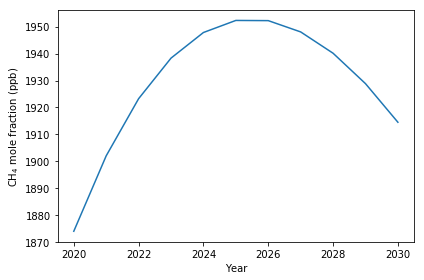

In [24]:
future_years = np.arange(2020,2031)
nyears = len(future_years)
ch4_2020 = ch4_noaa[-3]
emis_2020 = 600
emis_future = np.zeros((nyears))
emis_future[0] = emis_2020
emis_anth = 400

# Write a loop to define future emissions
for ti in range(10):
    emis_future[ti+1] = emis_future[ti] - 0.03*emis_anth

# Run box model with temporally variant emissions:
ch4_future = box_model.model(future_years, ch4_2020, emis_future,k)

box_model.plot_model(future_years,ch4_future)


In [25]:
print(ch4_future)

[1874.         1902.01714351 1923.24106686 1938.31823043 1947.83357574
 1952.31637978 1952.24555217 1948.05442826 1940.13510607 1928.84237059
 1914.49724454]


1874.0